# Importing the libary

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.linear_model import LinearRegression

Importing .csv file 

In [43]:
ball = pd.read_csv('baseball.csv')

# Checking the first five row and last five row

# SOME ABBREVIATION OF DATASET
Runs: R
At Bats: AB
Hits : H
Doubles : 2B
Triples : 3B
Homeruns : HR
Walks : BB
Strikeouts : SO
Stolen Bases : SB
Runs Allowed : RA
Earned Runs : ER
Earned Run Average : ERA
Shutouts : SO 
Saves : SV
Complete Games : CG
Errors : E
Win :W

In [44]:
ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [45]:
ball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


Shape The Dataframe

In [46]:
ball.shape

(30, 17)

Getting the basis info about the data set 

In [47]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Checking the null value by heatmap

In [48]:
ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

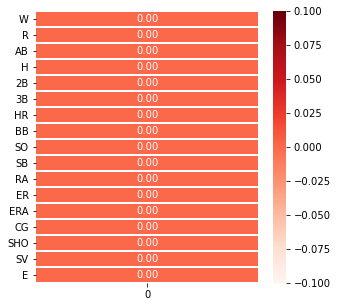

In [49]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(ball.isnull().sum().to_frame(),linewidths=0.5, annot=True, fmt= '.2f',cmap = 'Reds')

Getting the stats about the data set 

In [50]:
ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# checking the correation by pearson

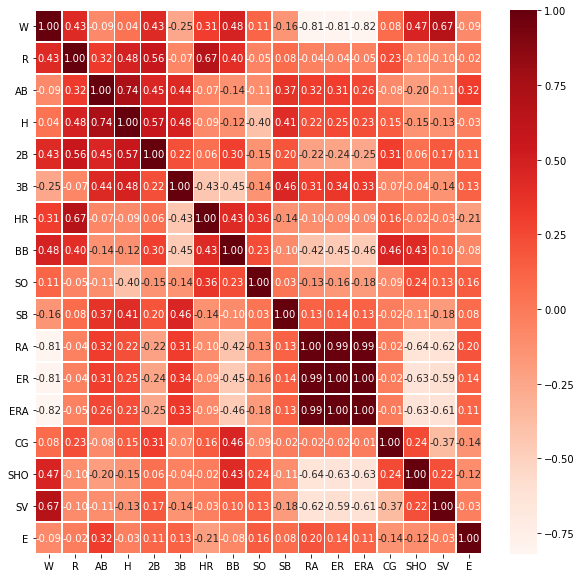

In [51]:
cor = ball.corr(method ="pearson")
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor,linewidths=0.5, annot=True, fmt= '.2f',cmap = 'Reds')
plt.yticks(rotation=0);

getting the count of run and their coorelation with win 

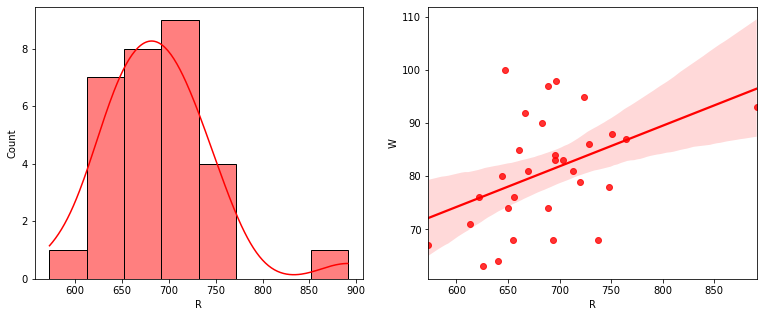

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=ball , color = "r")
plt.show()

 outliers is present between 850 and 900.remove the outlier by  Percentile :

In [53]:
upper_limit = ball['R'].quantile(0.99)
lower_limit = ball['R'].quantile(0.01)

In [54]:
upper_limit

854.1700000000001

In [55]:
lower_limit

584.6

In [56]:
new_ball = ball[(ball['R'] <= 854.17) & (ball['R'] >= 584.6)]

In [57]:
new_ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [58]:
ball['R'] = np.where(ball['R'] >= upper_limit,upper_limit,np.where(ball['R'] <= lower_limit,lower_limit,ball['R']))

In [59]:
ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724.00,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696.00,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669.00,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622.00,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689.00,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,854.17,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764.00,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713.00,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644.00,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748.00,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


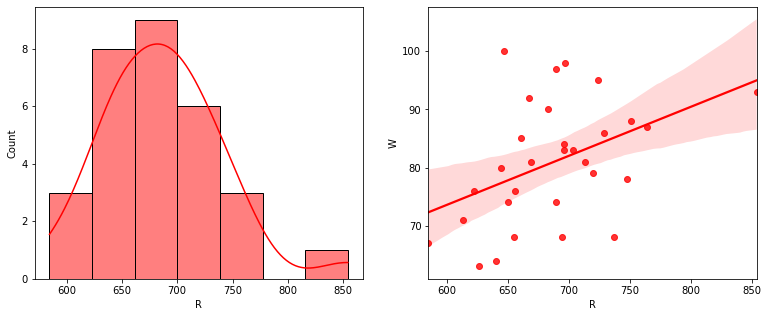

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=ball , color = "r")
plt.show()

Run And Win is Lineary Co related

# Getting the count At Ball And Their Co-Realtion With win  

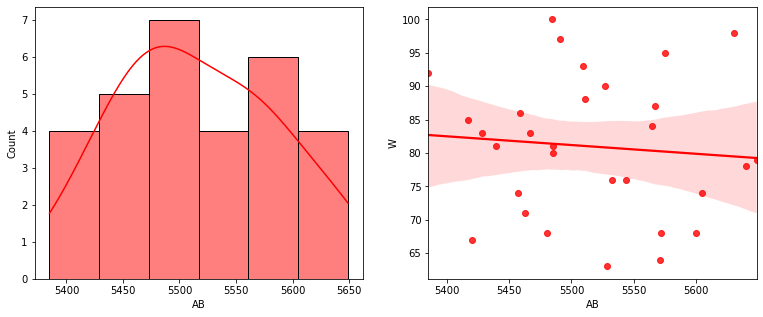

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='AB',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='AB',y='W',data=ball , color = "r")
plt.show()

At Balls is Very Weekly Related To Wins 

# Getting the count Hits And Their Co-Realtion With win

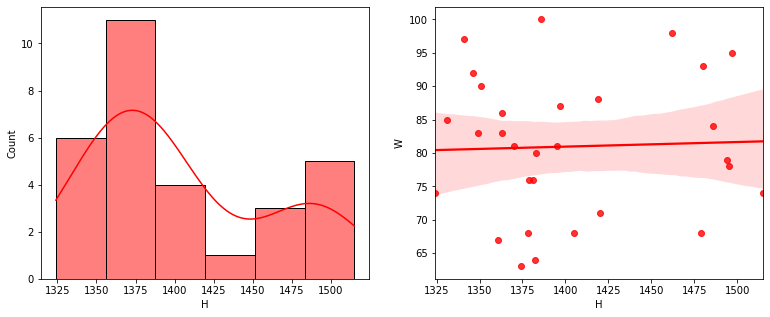

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='H',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='H',y='W',data=ball , color = "r")
plt.show()

 Hits Are Also Very Weekly Related 

# Getting the count Doubles And Their Co-Realtion With Win 

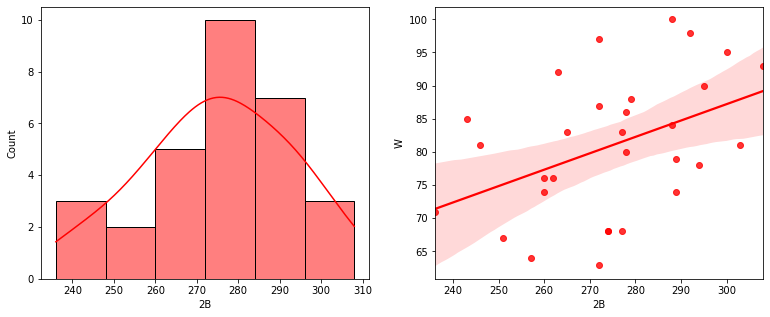

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='2B',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='2B',y='W',data=ball , color = "r")
plt.show()

Doubles Are Lineary Related to win  

# Getting the count At Home Run And Their Co-Realtion With win 

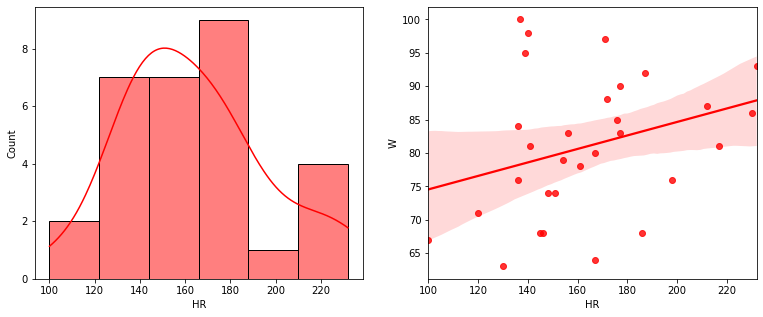

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='HR',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='HR',y='W',data=ball , color = "r")
plt.show()

Home Run Is Low Co-Related with Win 

# Getting the count Walk And Their Co-Realtion With win

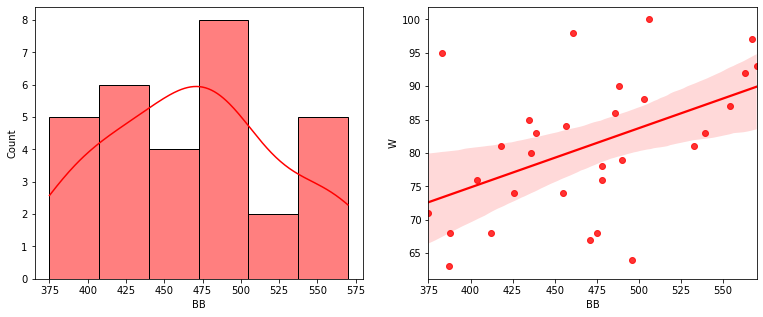

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='BB',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='BB',y='W',data=ball , color = "r")
plt.show()

Walk and Win Are Slightly Co-Related To Win 

# Getting the count At StrikeOut And Their Co-Realtion With win

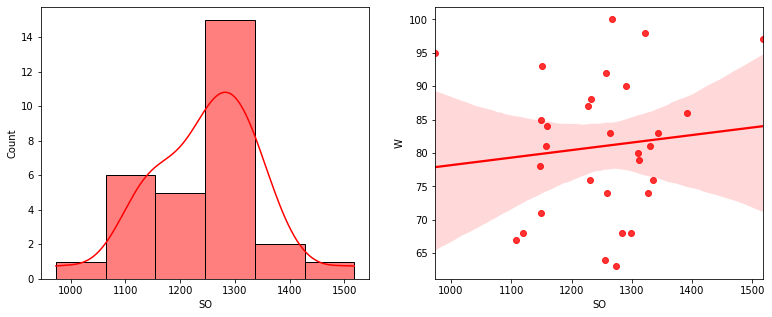

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SO',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='SO',y='W',data=ball , color = "r")
plt.show()

Strikeout And Win Are not Co-Related to each other 

# Getting the count At StolenBases And Their Co-Realtion With win

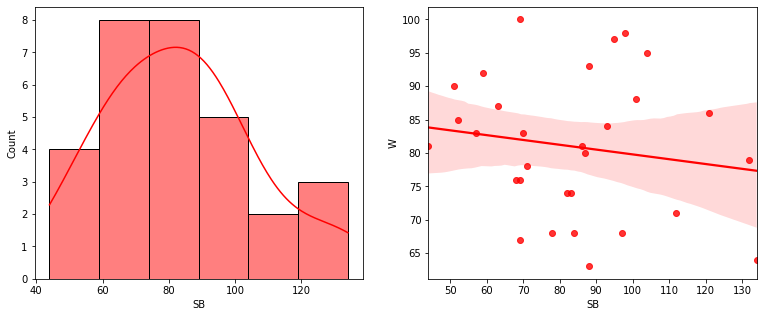

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SB',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='SB',y='W',data=ball , color = "r")
plt.show()

StolenBases Are Not Co - Related to each other 

# Getting the count At EarnedRun And Their Co-Realtion With win

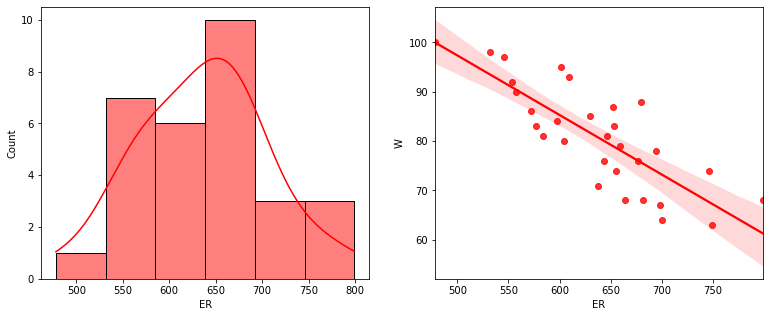

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ER',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='ER',y='W',data=ball , color = "r")
plt.show()

EarnedRun and Win Are Not Co-Related 

# Getting the count At CompleteGame And Their Co-Realtion With win

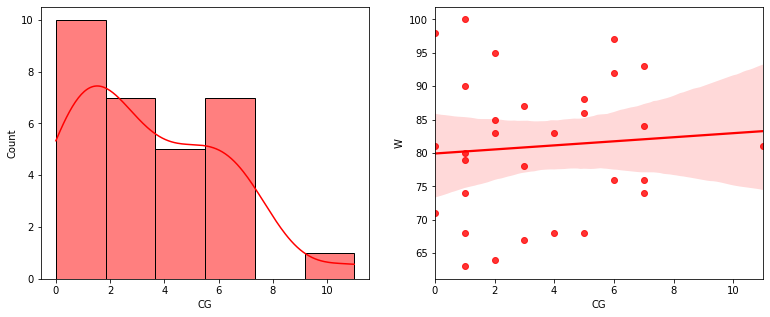

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='CG',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='CG',y='W',data=ball , color = "r")
plt.show()

CompleteGame and win are not Co-Related to each other 

# Getting the count At Shutout And Their Co-Realtion With win

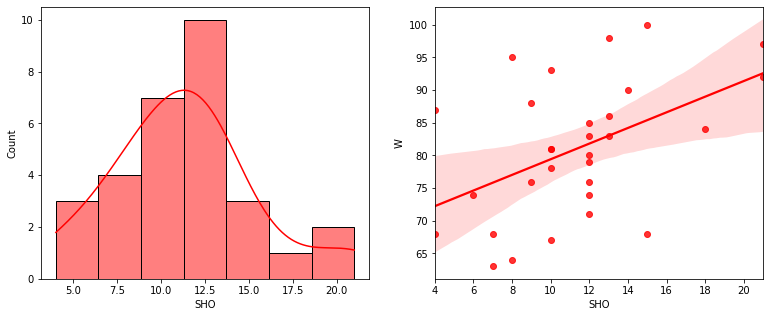

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SHO',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='SHO',y='W',data=ball , color = "r")
plt.show()

Shutout and Wins are highly Co-Related.

# Getting the count At Saves And Their Co-Realtion With win

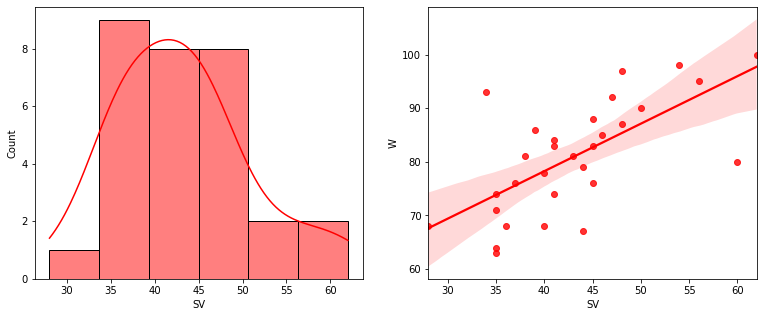

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SV',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='SV',y='W',data=ball , color = "r")
plt.show()

Saves And Wins Are Co - Realted to each other

# Getting the count At Errors And Their Co-Realtion With win

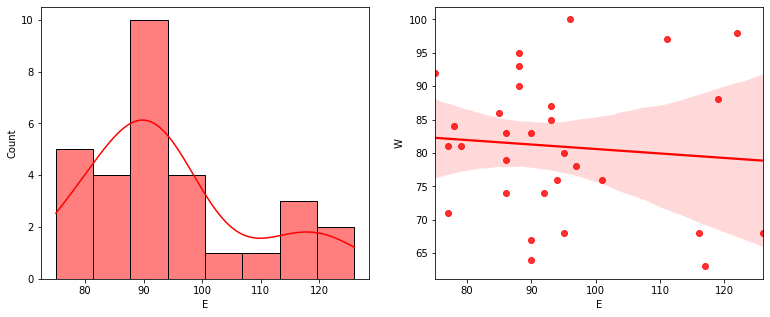

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='E',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='E',y='W',data=ball , color = "r")
plt.show()

Errors and Wins are not Co-Realted to each other 

# Getting the count At RunAllowed And Their Co-Realtion With win

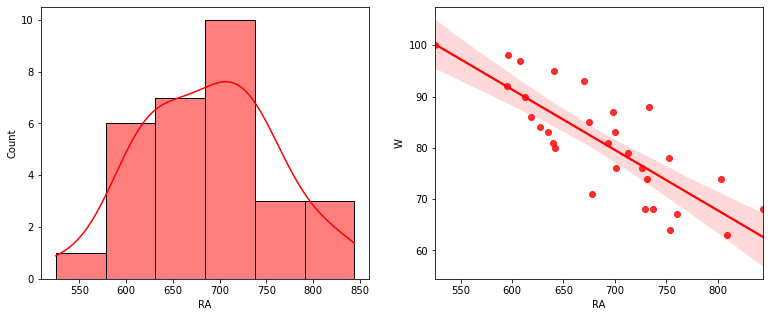

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='RA',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='RA',y='W',data=ball , color = "r")
plt.show()

RunAlowed is highly co related with win 

# Getting the count At EarnedRunAvg.And Their Co-Realtion With win

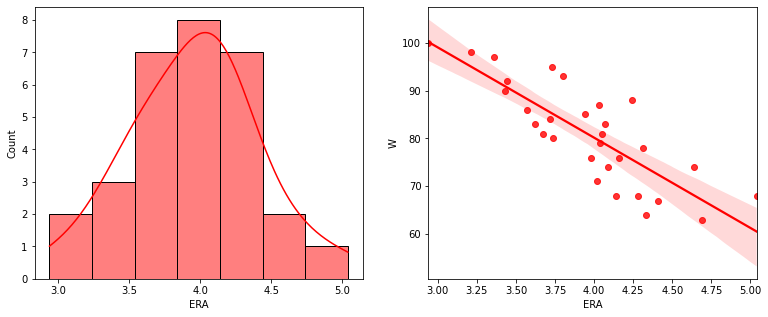

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ERA',data=ball,kde=True , color = "r")
plt.subplot(1,3,2)
sns.regplot(x='ERA',y='W',data=ball , color = "r")
plt.show()

Earned
RunAvg And Win are Co - Related

# Building a Learning Model 

In [75]:
attributes = ['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']

data_attributes = ball[attributes]

Split The Data into Train and Test(i.e. 75 percent of our data for the train data set and use the other 25 percent for our test data set)

In [76]:
train = ball.sample(frac=0.70, random_state=1)
test = ball.loc[ball.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

In [77]:
warnings.filterwarnings('ignore')
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
print(mae)

1.522591576628786e-14


In [78]:
y_pred_train = lr.predict(x_train)

In [79]:
y_pred_test = lr.predict(x_test)

In [80]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 1.522591576628786e-14
MAE for test set is 1.522591576628786e-14
----------------------------------------------------------------------------------------
MSE for training set is 4.447672913246086e-28
MSE for test set is 4.447672913246086e-28
----------------------------------------------------------------------------------------
RMSE for training set is 2.108950666385083e-14
RMSE for test set is 2.108950666385083e-14
